In [1]:
# Finite difference no lineal case

"""
 y'' = f(x,y,y') , a <= x <= b , y(a) = alpha , y(b) = beta

INPUT: f(x,y,y'')
       a
       b
       alpha
       beta
       n number of points
       tol -> tolerance
       M -> number of iterations

OUTPUT: approximation wi to y(xi)

"""


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def difNoLineal(aa,bb,alpha,beta,n,tol,M):

    # n number of points without a and b
    h = (bb-aa)/(n+1)  # cuz we have 0,1,...,n+1 -> n+2 points -> n+1 intervals

    w = np.zeros([n+2])
    a = np.zeros([n+1])
    b = np.zeros([n+1])
    c = np.zeros([n+1])
    d = np.zeros([n+1])

    w[0] = alpha
    w[n+1] = beta

    for i in range(1,n+1):
        w[i] = alpha + i*(beta-alpha)*h/(bb-aa)

    k = 1
    while k <= M:
        x = aa+h
        t = (w[2] - alpha)/(2*h)
        a[1] = 2 + h**2*dfy(x,w[1],t)
        b[1] = -1 + (h/2)*dfyp(x,w[1],t)
        d[1] = -(2*w[1] - w[2] - alpha + h**2*f(x,w[1],t))

        for i in range(2,n): #indexing
            x = aa+i*h
            t = (w[i+1] - w[i-1])/(2*h)
            a[i] = 2 + h**2*dfy(x,w[i],t)
            b[i] = -1 + (h/2)*dfyp(x,w[i],t)
            c[i] = -1 - (h/2)*dfyp(x,w[i],t)
            d[i] = -(2*w[i] - w[i+1] - w[i-1] + h**2*f(x,w[i],t))

        x = bb-h
        t = (beta - w[n-1])/(2*h)
        a[n] = 2 + h**2*dfy(x,w[n],t)
        c[n] = -1 - (h/2)*dfyp(x,w[n],t)
        d[n] = -(2*w[n] - beta - w[n-1] + h**2*f(x,w[n],t))

        # Solve tridiagonal system for Crout algorithm.

        l = np.zeros([n+1])
        u = np.zeros([n+1])
        z = np.zeros([n+1])

        l[1] = a[1]
        u[1] = b[1]/a[1]
        z[1] = d[1]/l[1]

        for i in range(2,n): #indexing
            l[i] = a[i] - c[i]*u[i-1]
            u[i] = b[i]/l[i]
            z[i] = (d[i] - c[i]*z[i-1])/l[i]

        l[n] = a[n] - c[n]*u[n-1]
        z[n] = (d[n] - c[n]*z[n-1])/l[n]

        v = np.zeros([n+2])

        v[n] = z[n]
        w[n] = w[n] + v[n]

        for i in range(n-1,0):
            v[i] = z[i] - u[i]*v[i+1]
            w[i] = w[i] + v[i]

        xx=np.zeros(n+2)


        if np.linalg.norm(v) <= tol:
            for i in range(0,n+1):
                xx[i]=alpha+i*h
            df = pd.DataFrame({"x_i":xx, "w_i":w})
            print(df)
            return w

        k = k+1

    print("Max of iterations, performance over without exit")


def f(x,y,z):
    # f(x,y,y')
    return (1/8)*(32.0 + 2*x**3 - y*z)  # modify here to change function

# df(x,y,y')/dy
def dfy(x,y,z):
    dy = 0.00001
    return (f(x,y+dy,z)-f(x,y,z))/dy

# df(x,y,y')/dy'
def dfyp(x,y,z):
    dzz = 0.00001
    return (f(x,y,z+dzz)-f(x,y,z))/dzz


def main():

    a = 1.0
    b = 3.0
    alpha = 17.0
    beta = 43/3
    n = 19
    tol = 1e-8
    M = 5

    x = np.linspace(a,b,n+2)
    w = difNoLineal(a,b,alpha,beta,n,tol,M)

    #plt.plot(x,w)
    #plt.show()

main()

         x_i       w_i
0   1.000000  1.000000
1   1.157080  1.171828
2   1.314159  1.343656
3   1.471239  1.515485
4   1.628319  1.687313
5   1.785398  1.859141
6   1.942478  2.030969
7   2.099557  2.202797
8   2.256637  2.374625
9   2.413717  2.685453
10  0.000000  2.718282


         w_i
0   1.000000
1   1.169421
2   1.362441
3   1.575388
4   1.801386
5   2.030117
6   2.248193
7   2.440263
8   2.590837
9   2.686531
10  2.718282


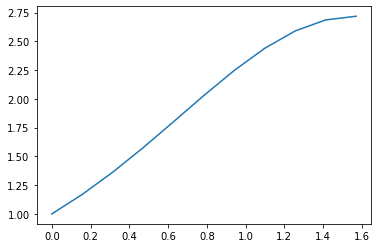

In [3]:
# Finite difference no lineal case

"""
 y'' = f(x,y,y') , a <= x <= b , y(a) = alpha , y(b) = beta

INPUT: f(x,y,y'')
       a
       b
       alpha
       beta
       n number of points
       tol -> tolerance
       M -> number of iterations

OUTPUT: approximation wi to y(xi)

"""


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def difNoLineal(aa,bb,alpha,beta,n,tol,M):

    # n number of points without a and b
    h = (bb-aa)/(n+1)  # cuz we have 0,1,...,n+1 -> n+2 points -> n+1 intervals

    w = np.zeros([n+2])
    a = np.zeros([n+1])
    b = np.zeros([n+1])
    c = np.zeros([n+1])
    d = np.zeros([n+1])

    w[0] = alpha
    w[n+1] = beta

    for i in range(1,n+1):
        w[i] = alpha + i*(beta-alpha)*h/(bb-aa)

    k = 1

    while k <= M:

        x = aa+h
        t = (w[2] - alpha)/(2*h)
        a[1] = 2 + h**2*dfy(x,w[1],t)
        b[1] = -1 + (h/2)*dfyp(x,w[1],t)
        d[1] = -(2*w[1] - w[2] - alpha + h**2*f(x,w[1],t))

        for i in range(2,n):
            x = aa+i*h
            t = (w[i+1] - w[i-1])/(2*h)
            a[i] = 2 + h**2*dfy(x,w[i],t)
            b[i] = -1 + (h/2)*dfyp(x,w[i],t)
            c[i] = -1 - (h/2)*dfyp(x,w[i],t)
            d[i] = -(2*w[i] - w[i+1] - w[i-1] + h**2*f(x,w[i],t))

        x = bb-h
        t = (beta - w[n-1])/(2*h)
        a[n] = 2 + h**2*dfy(x,w[n],t)
        c[n] = -1 - (h/2)*dfyp(x,w[n],t)
        d[n] = -(2*w[n] - beta - w[n-1] + h**2*f(x,w[n],t))

        # Solve tridiagonal system for Crout algorithm.

        l = np.zeros([n+1])
        u = np.zeros([n+1])
        z = np.zeros([n+1])

        l[1] = a[1]
        u[1] = b[1]/a[1]
        z[1] = d[1]/l[1]

        for i in range(2,n):
            l[i] = a[i] - c[i]*u[i-1]
            u[i] = b[i]/l[i]
            z[i] = (d[i] - c[i]*z[i-1])/l[i]

        l[n] = a[n] - c[n]*u[n-1]
        z[n] = (d[n] - c[n]*z[n-1])/l[n]

        v = np.zeros([n+2])

        v[n] = z[n]
        w[n] = w[n] + v[n]

        for i in range(n-1,0,-1):
            v[i] = z[i] - u[i]*v[i+1]
            w[i] = w[i] + v[i]

        if np.linalg.norm(v) <= tol:
            df = pd.DataFrame({"w_i":w})
            print(df)
            return w

        k = k+1

    print("Max of iterations, performance over without exit")


def f(x,y,z):
    # f(x,y,y')
    return z*np.cos(x)-y*np.log(y)  # modify here to change function

# df(x,y,y')/dy
def dfy(x,y,z):
    dy = 0.00001
    return (f(x,y+dy,z)-f(x,y,z))/dy

# df(x,y,y')/dy'
def dfyp(x,y,z):
    dzz = 0.00001
    return (f(x,y,z+dzz)-f(x,y,z))/dzz


def main():

    a = 0.0
    b = np.pi/2
    alpha = 1.0
    beta = np.exp(1)
    n = 9
    tol = 1e-4
    M = 5

    x = np.linspace(a,b,n+2)
    w = difNoLineal(a,b,alpha,beta,n,tol,M)

    plt.plot(x,w)
    plt.show()

main()